In [16]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path='images', img_size=64):
    X, y = [], []
    class_names = sorted(os.listdir(folder_path))  # e.g. ['call_me', 'fist', ...]
    label_map = {name: idx for idx, name in enumerate(class_names)}  # e.g. {'call_me': 0, 'fist': 1, ...}

    for label in class_names:
        label_folder = os.path.join(folder_path, label)
        for img_name in os.listdir(label_folder):
            img_path = os.path.join(label_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label_map[label])
    
    return np.array(X), np.array(y), label_map



In [18]:
X_train, y_train, label_map = load_images_from_folder(train_path)
X_test, y_test, _ = load_images_from_folder('images')


In [19]:
print("Label Mapping:")
for name, idx in label_map.items():
    print(f"{idx} = {name}")


Label Mapping:
0 = call_me
1 = fingers_crossed
2 = okay
3 = paper
4 = peace
5 = rock
6 = rock_on
7 = scissor
8 = thumbs
9 = up


In [20]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to add channel dimension (for grayscale)
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [22]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(64, 64, 1)),   # ✅ Explicit input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat), batch_size=32)


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.4073 - loss: 1.6584 - val_accuracy: 0.9043 - val_loss: 0.3512
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8418 - loss: 0.5016 - val_accuracy: 0.9685 - val_loss: 0.1350
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9029 - loss: 0.2932 - val_accuracy: 0.9853 - val_loss: 0.0724
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9327 - loss: 0.1985 - val_accuracy: 0.9878 - val_loss: 0.0522
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9467 - loss: 0.1610 - val_accuracy: 0.9960 - val_loss: 0.0223
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9560 - loss: 0.1316 - val_accuracy: 0.9985 - val_loss: 0.0131
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9642 - loss: 0.1114 - val_accuracy: 0.9975 - val_loss: 0.0161
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9691 - loss: 0.0906 - val_accu

In [25]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", accuracy)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0032
Test Accuracy: 0.9998092651367188


In [27]:
from keras.saving import save_model
save_model(model, "gesture_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


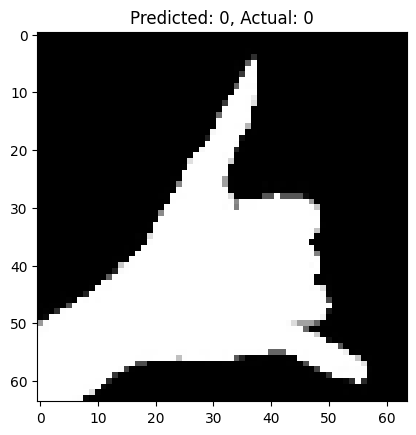

In [28]:
import matplotlib.pyplot as plt
prediction = model.predict(np.expand_dims(X_test[0], axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(X_test[0].reshape(64,64), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.show()
